In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


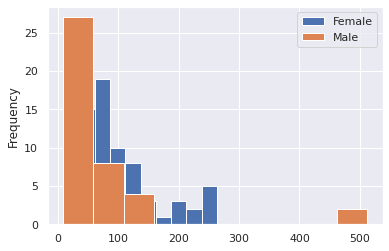

In [24]:
train["Fare"][(train["Survived"]==1)&(train["Sex"]=="female")].plot(kind="hist",label="Female")
train["Fare"][(train["Survived"]==1)&(train["Sex"]=="male")].plot(kind="hist",label="Male")
plt.legend()
plt.show()

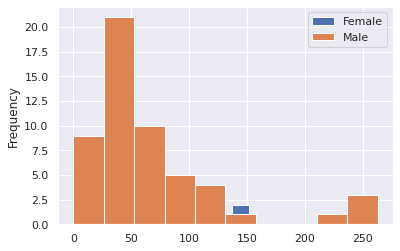

In [26]:
train["Fare"][(train["Survived"]==0)&(train["Sex"]=="female")].plot(kind="hist",label="Female")
train["Fare"][(train["Survived"]==0)&(train["Sex"]=="male")].plot(kind="hist",label="Male")
plt.legend()
plt.show()

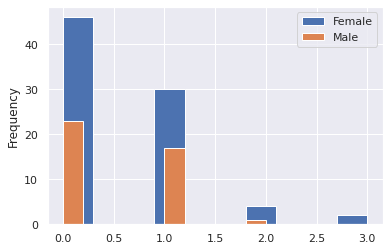

In [28]:
train["SibSp"][(train["Survived"]==1)&(train["Sex"]=="female")].plot(kind="hist",label="Female")
train["SibSp"][(train["Survived"]==1)&(train["Sex"]=="male")].plot(kind="hist",label="Male")
plt.legend()
plt.show()

<AxesSubplot:ylabel='Frequency'>

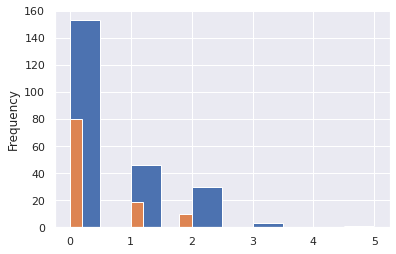

In [8]:
train["Parch"][(train["Survived"]==1)&(train["Sex"]=="female")].plot(kind="hist")
train["Parch"][(train["Survived"]==1)&(train["Sex"]=="male")].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

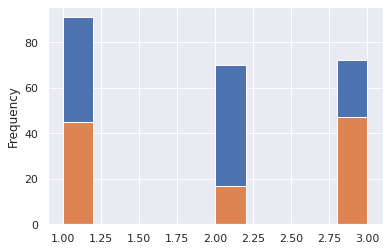

In [9]:
train["Pclass"][(train["Survived"]==1)&(train["Sex"]=="female")].plot(kind="hist")
train["Pclass"][(train["Survived"]==1)&(train["Sex"]=="male")].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

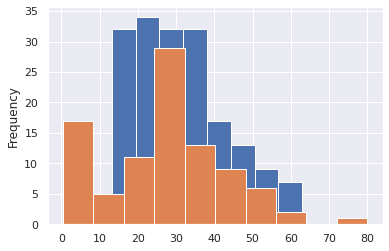

In [10]:
train["Age"][(train["Survived"]==1)&(train["Sex"]=="female")].plot(kind="hist")
train["Age"][(train["Survived"]==1)&(train["Sex"]=="male")].plot(kind="hist")

In [11]:
train = train.dropna()
test = test.dropna()

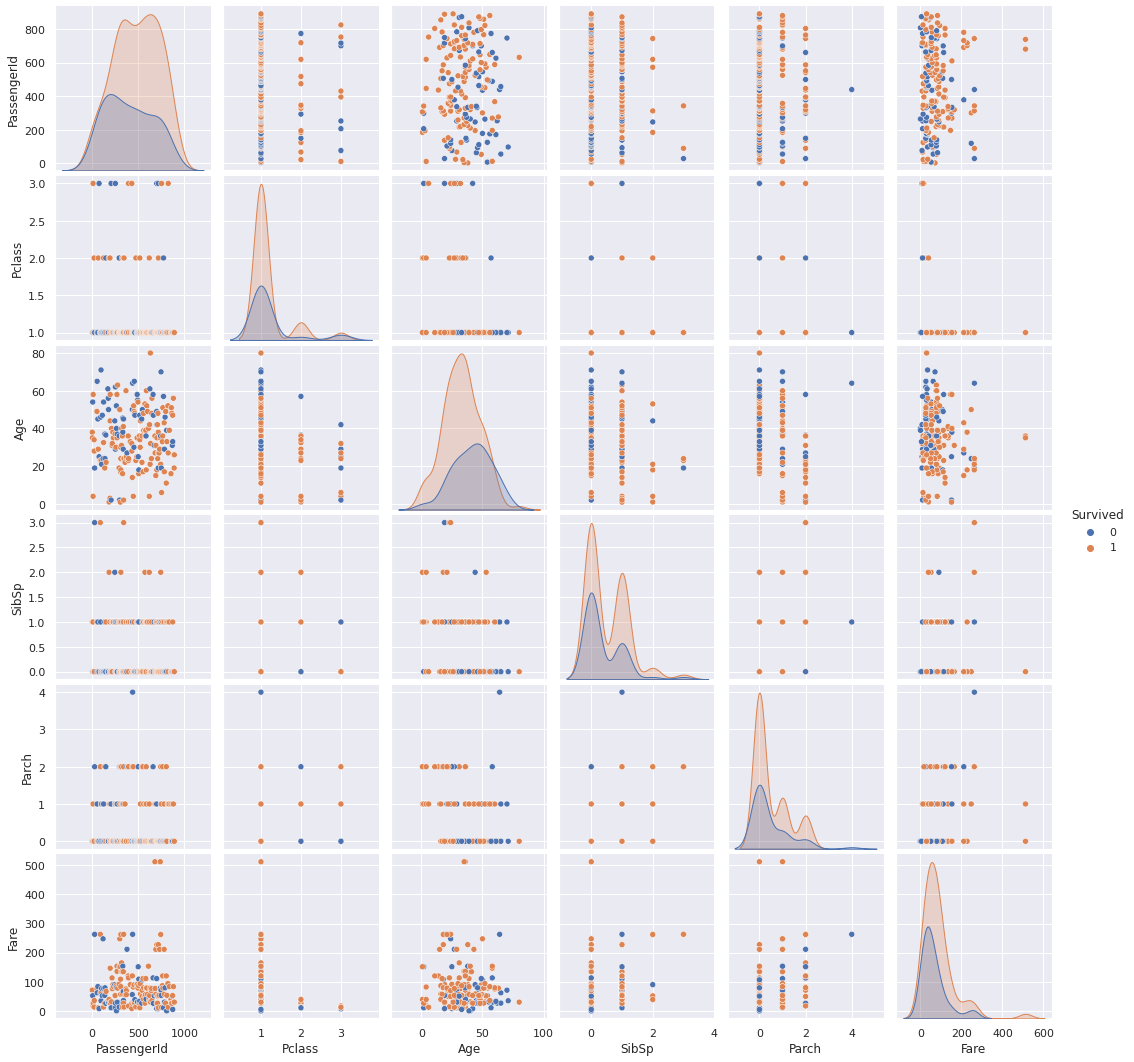

In [12]:
sns.pairplot(train, hue="Survived")

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(train[['Pclass','Age','SibSp','Parch','Fare']], train['Survived'])
test['cfc_predict'] = clf.predict(test[['Pclass','Age','SibSp','Parch','Fare']])
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cfc_predict
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,1
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,1
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,1
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,1
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C,1
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,1
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,1
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,1
